Test case for handling overlap mesages

In [1]:
import numpy as np

# Handle overlap

In [34]:
## function copied from v3.3

verbose = True


def _update_feed_handle_overlap(target_feed, incoming_ids, incoming_shares):
    """
    - target_feed (tuple of lists): (message_ids, no_shares, ages), represents an agent's news feed
    """
    # new_message_age = 0
    # check overlap with existing messages
    # if message exists, reset age
    # for the rest of the messages, increment age

    messages, no_shares, ages = target_feed

    feed = zip(messages, no_shares, ages)  # list of tuples
    sorted_feed = sorted(list(feed), key=lambda x: x[0])
    new_messages, new_shares, new_ages = [np.array(i) for i in zip(*sorted_feed)]
    print(new_messages, new_shares, new_ages)
    sorted_incoming = sorted(
        list(zip(incoming_ids, incoming_shares)), key=lambda x: x[0]
    )
    sorted_incoming_messages, sorted_incoming_shares = [
        np.array(i) for i in zip(*sorted_incoming)
    ]
    # return sorted intersection
    overlap, x_ind, y_ind = np.intersect1d(
        new_messages, sorted_incoming_messages, return_indices=True
    )
    print(new_messages, new_shares, new_ages)
    if verbose:
        print(f"incoming ids : {incoming_ids} --> feed: {messages}")
        print(f"no_shares : {incoming_shares} --> feed: {no_shares}")
        print(f"incoming age : {np.zeros(len(incoming_ids))} --> feed: {ages}")

        print(f"overlap message between {messages} and {incoming_ids} are: {overlap}")
        print(f"sorted messages incoming: {sorted_incoming_messages}")
        print(
            f"overlap no_shares: old: {new_shares[x_ind]}, incoming: {sorted_incoming_shares[y_ind]}"
        )
        print("update no_share and age of overlapping messages.. ")
        print(
            f"before:  messages: {new_messages}, shares: {new_shares}, ages: {new_ages}"
        )

    # update no_shares and age of existing messages from the sorted old feed:
    new_shares[x_ind] += sorted_incoming_shares[y_ind]
    # add age to all other messages
    new_ages += np.ones(len(new_ages), dtype=int)
    # reset age existing messages
    new_ages[x_ind] = np.zeros(len(y_ind))

    if verbose:
        print(
            f"after:  messages: {new_messages}, shares: {new_shares}, ages: {new_ages}"
        )
    print("y_ind: ", y_ind)
    print(sorted_incoming_messages[~np.array([0, 1])])
    print("sorted incoming except for overlap: ", sorted_incoming_messages[~y_ind])
    # push new messages into the feed (only the non-overlapping messages)
    new_shares = np.insert(new_shares, 0, sorted_incoming_shares[~y_ind])
    new_messages = np.insert(new_messages, 0, sorted_incoming_messages[~y_ind])

    new_ages = np.insert(new_ages, 0, np.zeros(len(sorted_incoming_shares[~y_ind])))

    if verbose:
        print(
            f"updated: messages: {new_messages}, shares: {new_shares}, ages: {new_ages}"
        )
    updated_feed = (list(new_messages), list(new_shares), list(new_ages))
    return updated_feed


def _handle_oversized_feed(newsfeed, alpha=15):
    """
    Handles oversized newsfeed
    Returns the newsfeed (tuple of lists) where the oldest message is removed
    Input:
        feed (tuple - (list of int, list of int)): (list of mess_ids - list of popularities), represents an agent's news feed
    """
    # Remove messages based on age - oldest first
    messages, shares, ages = newsfeed

    sorted_by_age = sorted(zip(messages, shares, ages), key=lambda x: x[2])
    sorted_messages, sorted_shares, sorted_ages = [list(i) for i in zip(*sorted_by_age)]

    updated_feed = (
        sorted_messages[:alpha],
        sorted_shares[:alpha],
        sorted_ages[:alpha],
    )

    assert len(updated_feed[0]) <= alpha

    return updated_feed

In [66]:
## function copied from v3.3

verbose = True


def update_feed_handle_overlap(target_feed, incoming_ids, incoming_shares):
    """
    - target_feed (tuple of lists): (message_ids, no_shares, ages), represents an agent's news feed
    """
    # new_message_age = 0
    # check overlap with existing messages
    # if message exists, reset age
    # for the rest of the messages, increment age

    messages, no_shares, ages = [np.array(i) for i in target_feed]

    # feed = zip(messages, no_shares, ages)  # list of tuples
    # sorted_feed = sorted(list(feed), key=lambda x: x[0])
    # new_messages, new_shares, new_ages = [np.array(i) for i in zip(*sorted_feed)]
    # print(new_messages, new_shares, new_ages)
    # sorted_incoming = sorted(
    #     list(zip(incoming_ids, incoming_shares)), key=lambda x: x[0]
    # )
    # sorted_incoming_messages, sorted_incoming_shares = [
    #     np.array(i) for i in zip(*sorted_incoming)
    # ]
    # return sorted intersection
    overlap, x_ind, y_ind = np.intersect1d(messages, incoming_ids, return_indices=True)
    # print(new_messages, new_shares, new_ages)
    if verbose:
        print(f"incoming ids : {incoming_ids} --> feed: {messages}")
        print(f"no_shares : {incoming_shares} --> feed: {no_shares}")
        print(f"incoming age : {np.zeros(len(incoming_ids))} --> feed: {ages}")

        print(f"overlap message between {messages} and {incoming_ids} are: {overlap}")
        # print(f"sorted messages incoming: {sorted_incoming_messages}")
        # print(
        #     f"overlap no_shares: old: {new_shares[x_ind]}, incoming: {sorted_incoming_shares[y_ind]}"
        # )
        print("update no_share and age of overlapping messages.. ")
        print(f"before:  messages: {messages}, shares: {no_shares}, ages: {ages}")

    print(f"incoming: {incoming_ids}")

    print(f"x_idx:{x_ind}, y_idx:{y_ind}")
    print("incoming except for overlap: ", incoming_ids[~np.array(y_ind)])
    mask_y = np.zeros(len(incoming_ids), bool)
    mask_y[[y_ind]] = True

    print("(correct) incoming except for overlap: ", incoming_ids[~mask_y])
    mask_x = np.zeros(len(messages), bool)
    mask_x[[x_ind]] = True
    print(f"mask_x: {mask_x}, mask_y: {mask_y}")
    # update no_shares and age of existing messages from the sorted old feed:
    print(
        "incoming_shares (to add to existing) incoming[mask_y]: ",
        incoming_shares[mask_y],
    )
    print("no_shares (existing) [mask_x]: ", no_shares[mask_x])
    no_shares[mask_x] += incoming_shares[mask_y]

    # add age to all other messages
    ages += np.ones(len(ages), dtype=int)
    # reset age existing messages
    ages[mask_x] = np.zeros(len(y_ind))

    if verbose:
        print(f"after:  messages: {messages}, shares: {no_shares}, ages: {ages}")
    # print("y_ind: ", y_ind)
    # print(sorted_incoming_messages[~np.array([0, 1])])

    # push new messages into the feed (only the non-overlapping messages)
    no_shares = np.insert(no_shares, 0, incoming_shares[~mask_y])
    messages = np.insert(messages, 0, incoming_ids[~mask_y])

    ages = np.insert(ages, 0, np.zeros(len(incoming_shares[~mask_y])))

    if verbose:
        print(f"updated: messages: {messages}, shares: {no_shares}, ages: {ages}")
    updated_feed = (list(messages), list(no_shares), list(ages))
    return updated_feed


# def _handle_oversized_feed(newsfeed, alpha=15):
#     """
#     Handles oversized newsfeed
#     Returns the newsfeed (tuple of lists) where the oldest message is removed
#     Input:
#         feed (tuple - (list of int, list of int)): (list of mess_ids - list of popularities), represents an agent's news feed
#     """
#     # Remove messages based on age - oldest first
#     messages, shares, ages = newsfeed

#     sorted_by_age = sorted(zip(messages, shares, ages), key=lambda x: x[2])
#     sorted_messages, sorted_shares, sorted_ages = [list(i) for i in zip(*sorted_by_age)]

#     updated_feed = (
#         sorted_messages[:alpha],
#         sorted_shares[:alpha],
#         sorted_ages[:alpha],
#     )

#     assert len(updated_feed[0]) <= alpha

#     return updated_feed

In [5]:
a = np.array([1, 2, 3, 4])
a[np.array([0, 1])]

array([1, 2])

In [6]:
a = np.array([1, 2])
a = np.insert(a, 0, [100, 100])
a

array([100, 100,   1,   2])

In [5]:
import numpy as np

incoming_ids = np.array([100, 2])
incoming_shares = np.array([10, 4])

### Test case 1 

In [7]:
# incoming messages, if not overlapping are added at the beginning of the list
# if a message overlaps, its popularity is updated (+=new popularity), and age is reset to 0
messages = np.array([3, 1, 2, 4])
no_shares = [1, 1, 3, 1]
ages = [1, 1, 1, 1]

target_feed = (messages, no_shares, ages)
correct_output = ([100, 1, 2, 3, 4], [10, 1, 7, 1, 1], [0, 2, 0, 2, 2])

In [8]:
new_feed = _update_feed_handle_overlap(target_feed, incoming_ids, incoming_shares)

incoming ids : [100   2] --> feed: [3 1 2 4]
no_shares : [10  4] --> feed: [1, 1, 3, 1]
incoming age : [0. 0.] --> feed: [1, 1, 1, 1]
overlap message between [3 1 2 4] and [100   2] are: [2]
sorted messages incoming: [  2 100]
no_shares: old: [7], incoming: [4]
update no_share and age of overlapping messages.. 
before:  messages: [1 2 3 4], shares: [1 7 1 1], ages: [2 0 2 2]
updated: messages: [100   1   2   3   4], shares: [10  1  7  1  1], ages: [0 2 0 2 2]


In [11]:
for idx, alist in enumerate(correct_output):
    print(alist)
    assert new_feed[idx] == alist

[100, 1, 2, 3, 4]
[10, 1, 7, 1, 1]
[0, 2, 0, 2, 2]


In [12]:
clipped = _handle_oversized_feed(new_feed, alpha=3)
clipped

([100, 2, 1], [10, 7, 1], [0, 0, 2])

In [13]:
correct_output_oversize = ([100, 2, 1], [10, 7, 1], [0, 0, 2])
for idx, alist in enumerate(correct_output_oversize):
    print(alist)
    assert clipped[idx] == alist

[100, 2, 1]
[10, 7, 1]
[0, 0, 2]


### Test case 2

In [38]:
# incoming messages, if not overlapping are added at the beginning of the list
# if a message overlaps, its popularity is updated (+=new popularity), and age is reset to 0
messages = np.array([1053])
no_shares = [1]
ages = [1]

target_feed = (messages, no_shares, ages)

incoming_ids = np.array([2878, 2108, 1053, 2629])
incoming_shares = np.array([1, 1, 1, 1])

correct_output = ([2108, 2629, 2878, 1053], [1, 1, 1, 2], [0, 0, 0, 0])

In [35]:
mask_y = np.ones(4, bool)
mask_y[[0, 1]] = False
mask_y

array([False, False,  True,  True])

In [36]:
~mask_y

array([ True,  True, False, False])

In [23]:
# Somehow indexing is wrong if array length==1
incoming_ids[~np.array([1])]

array([1053])

In [22]:
incoming_ids[~np.array([0, 1])]

array([2629, 1053])

In [16]:
mask = np.ones(len(incoming_ids), bool)
mask[[2]] = False
incoming_ids[mask]

array([2878, 2108, 2629])

In [41]:
new_feed = update_feed_handle_overlap(target_feed, incoming_ids, incoming_shares)
new_feed
# print("ASSERTION")
# for idx, alist in enumerate(correct_output):
#     print(alist)
#     assert new_feed[idx] == alist

incoming ids : [2878 2108 1053 2629] --> feed: [1053]
no_shares : [1 1 1 1] --> feed: [1]
incoming age : [0. 0. 0. 0.] --> feed: [1]
overlap message between [1053] and [2878 2108 1053 2629] are: [1053]
update no_share and age of overlapping messages.. 
before:  messages: [1053], shares: [1], ages: [1]
incoming: [2878 2108 1053 2629]
x_idx:[0], y_idx:[2]
incoming except for overlap:  [2108]
(correct) incoming except for overlap:  [2878 2108 2629]
after:  messages: [1053], shares: [2], ages: [0]
updated: messages: [2878 2108 2629 1053], shares: [1 1 1 2], ages: [0 0 0 0]


/var/folders/gj/zfw5qy_n09d78gdzsfht4c7m0000gn/T/ipykernel_91285/1088311880.py:48: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  mask_y[[y_ind]] = False
/var/folders/gj/zfw5qy_n09d78gdzsfht4c7m0000gn/T/ipykernel_91285/1088311880.py:52: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  mask_x[[x_ind]] = True


([2878, 2108, 2629, 1053], [1, 1, 1, 2], [0, 0, 0, 0])

### Rerun test 1

In [67]:
# incoming messages, if not overlapping are added at the beginning of the list
# if a message overlaps, its popularity is updated (+=new popularity), and age is reset to 0
messages = np.array([3, 1, 2, 4])
no_shares = [1, 1, 3, 1]
ages = [1, 1, 1, 1]

target_feed = (messages, no_shares, ages)
incoming_ids = np.array([100, 2])
incoming_shares = np.array([10, 4])

correct_output = ([100, 1, 2, 3, 4], [10, 1, 7, 1, 1], [0, 2, 0, 2, 2])

In [68]:
new_feed = update_feed_handle_overlap(target_feed, incoming_ids, incoming_shares)
new_feed

incoming ids : [100   2] --> feed: [3 1 2 4]
no_shares : [10  4] --> feed: [1 1 3 1]
incoming age : [0. 0.] --> feed: [1 1 1 1]
overlap message between [3 1 2 4] and [100   2] are: [2]
update no_share and age of overlapping messages.. 
before:  messages: [3 1 2 4], shares: [1 1 3 1], ages: [1 1 1 1]
incoming: [100   2]
x_idx:[2], y_idx:[1]
incoming except for overlap:  [100]
(correct) incoming except for overlap:  [100]
mask_x: [False False  True False], mask_y: [False  True]
incoming_shares (to add to existing) incoming[mask_y]:  [4]
no_shares (existing) [mask_x]:  [3]
after:  messages: [3 1 2 4], shares: [1 1 7 1], ages: [2 2 0 2]
updated: messages: [100   3   1   2   4], shares: [10  1  1  7  1], ages: [0 2 2 0 2]


/var/folders/gj/zfw5qy_n09d78gdzsfht4c7m0000gn/T/ipykernel_91285/4131754855.py:48: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  mask_y[[y_ind]] = True
/var/folders/gj/zfw5qy_n09d78gdzsfht4c7m0000gn/T/ipykernel_91285/4131754855.py:52: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  mask_x[[x_ind]] = True


([100, 3, 1, 2, 4], [10, 1, 1, 7, 1], [0, 2, 2, 0, 2])

Correct:
[100   2] --> feed: [3 1 2 4]

no_shares : [10  4] --> feed: [1 1 3 1]

incoming age : [0. 0.] --> feed: [1 1 1 1]

[100 3 1 2 4]

[10  1 1 7 1]

[0   1 1 0 1]

## Function

In [3]:
import numpy as np

agent_feeds = dict()

messages = np.array([3, 1, 2, 4])
no_shares = [1, 1, 3, 1]
ages = [1, 1, 1, 1]

agent_feeds["fil"] = (messages, no_shares, ages)

incoming_ids = np.array([100, 2])
incoming_shares = np.array([10, 4])

In [31]:
feed = messages, no_shares, ages

In [32]:
afeed = zip(messages, no_shares, ages)

In [33]:
bfeed = list(zip(feed))

In [34]:
list(bfeed)

[(array([3, 1, 2, 4]),), ([1, 1, 3, 1],), ([1, 1, 1, 1],)]

In [30]:
list(afeed)

[(3, 1, 1), (1, 1, 1), (2, 3, 1), (4, 1, 1)]

In [10]:
def update_feed_handle_overlap(target_id, incoming_ids, incoming_shares):
    messages, no_shares, ages = agent_feeds[target_id]

    feed = zip(messages, no_shares, ages)
    print(feed)
    sorted_feed = sorted(list(feed), key=lambda x: x[0])
    print(sorted_feed)
    new_messages, new_shares, new_ages = [np.array(i) for i in zip(*sorted_feed)]
    print(new_messages, new_shares, new_ages)

    print(incoming_ids, incoming_shares)
    sorted_incoming = sorted(
        list(zip(incoming_ids, incoming_shares)), key=lambda x: x[0]
    )

    sorted_incoming_messages, sorted_incoming_shares = [
        np.array(i) for i in zip(*sorted_incoming)
    ]
    print(sorted_incoming_messages, sorted_incoming_shares)
    # return sorted intersection
    overlap, x_ind, y_ind = np.intersect1d(
        new_messages, sorted_incoming_messages, return_indices=True
    )

    # update shares:
    print("update no_share and age of overlapping messages.. ")
    new_shares[x_ind] += sorted_incoming_shares[y_ind]
    new_ages += np.ones(len(new_ages), dtype=int)
    new_ages[x_ind] = np.zeros(len(y_ind))
    print(f"updated:  messages: {new_messages}, shares: {new_shares}, ages: {new_ages}")
    # only append non-overlapping messages
    # non_overlapping_shares = sorted_incoming_shares[~y_ind]
    # non_overlapping_messages = sorted_incoming_messages[~y_ind]
    # push new messages into the feed

    new_shares = np.insert(new_shares, 0, sorted_incoming_shares[~y_ind])
    new_messages = np.insert(new_messages, 0, sorted_incoming_messages[~y_ind])

    new_ages = np.insert(new_ages, 0, np.zeros(len(sorted_incoming_shares[~y_ind])))
    print(f"updated: messages: {new_messages}, shares: {new_shares}, ages: {new_ages}")
    new_feed = (new_messages, new_shares, new_ages)
    return new_feed

### Test function

In [17]:
# incoming messages, if not overlapping are added at the beginning of the list
# if a message overlaps, its popularity is updated (+=new popularity), and age is reset to 0
correct_output = ([100, 1, 2, 3, 4], [10, 1, 7, 1, 1], [0, 2, 0, 2, 2])

In [18]:
new_feed = update_feed_handle_overlap("fil", incoming_ids, incoming_shares)

[(1, 1, 1), (2, 3, 1), (3, 1, 1), (4, 1, 1)]
[1 2 3 4] [1 3 1 1] [1 1 1 1]
[100   2] [10  4]
[  2 100] [ 4 10]
update no_share and age of overlapping messages.. 
updated:  messages: [1 2 3 4], shares: [1 7 1 1], ages: [2 0 2 2]
updated: messages: [100   1   2   3   4], shares: [10  1  7  1  1], ages: [0 2 0 2 2]


In [19]:
for idx, alist in enumerate(correct_output):
    assert (new_feed[idx] == alist).all()

## Debug

In [242]:
messages = np.array([3, 1, 2, 4])
no_shares = [1, 1, 3, 1]
ages = [1, 1, 1, 1]
incoming = np.array([100, 2])
incoming_shares = np.array([10, 4])
# correct_output = ([1,2,3,4,100], [1, 3, 1,10], [1, 0, 1, 1,0])

In [243]:
feed = zip(messages, no_shares, ages)
print(feed)
sorted_feed = sorted(list(feed), key=lambda x: x[0])
print(sorted_feed)
new_messages, new_shares, new_ages = [np.array(i) for i in zip(*sorted_feed)]
print(new_messages, new_shares, new_ages)

print(incoming, incoming_shares)
sorted_incoming = sorted(list(zip(incoming, incoming_shares)), key=lambda x: x[0])

sorted_incoming_messages, sorted_incoming_shares = [
    np.array(i) for i in zip(*sorted_incoming)
]
print(sorted_incoming_messages, sorted_incoming_shares)
# return sorted intersection
overlap, x_ind, y_ind = np.intersect1d(
    new_messages, sorted_incoming_messages, return_indices=True
)

sorted_incoming_messages, sorted_incoming_shares
# if message exists, reset age
# for the rest of the messages, increment age
overlap, x_ind, y_ind

[(1, 1, 1), (2, 3, 1), (3, 1, 1), (4, 1, 1)]
[1 2 3 4] [1 3 1 1] [1 1 1 1]
[100   2] [10  4]
[  2 100] [ 4 10]


(array([2]), array([1]), array([0]))

In [244]:
incoming_ages = np.zeros(len(incoming))
print(f"incoming ids : {incoming} --> feed: {messages}")
print(f"no_shares : {incoming_shares} --> feed: {no_shares}")
print(f"incoming age : {incoming_ages} --> feed: {ages}")

incoming ids : [100   2] --> feed: [3 1 2 4]
no_shares : [10  4] --> feed: [1, 1, 3, 1]
incoming age : [0. 0.] --> feed: [1, 1, 1, 1]


In [245]:
new_messages[x_ind]

array([2])

In [246]:
print(f"overlap message between {messages} and {incoming} are: {overlap}")
print(f"sorted messages incoming: {sorted_incoming_messages}")
print(f"no_shares: old: {new_shares[x_ind]}, incoming: {sorted_incoming_shares[y_ind]}")

overlap message between [3 1 2 4] and [100   2] are: [2]
sorted messages incoming: [  2 100]
no_shares: old: [3], incoming: [4]


In [247]:
# # excluding overlapping messages
# mask = np.ones(len(sorted_incoming_messages), dtype=bool)
# mask[[y_ind],]=False
# retain = sorted_incoming_messages[mask]
# retain

In [248]:
new_ages

array([1, 1, 1, 1])

In [249]:
# update shares:
print("update no_share and age of overlapping messages.. ")
new_shares[x_ind] += sorted_incoming_shares[y_ind]
new_ages += np.ones(len(new_ages), dtype=int)
new_ages[x_ind] = np.zeros(len(y_ind))
print(f"updated:  messages: {new_messages}, shares: {new_shares}, ages: {new_ages}")
# only append non-overlapping messages
# non_overlapping_shares = sorted_incoming_shares[~y_ind]
# non_overlapping_messages = sorted_incoming_messages[~y_ind]
new_shares = np.insert(new_shares, 0, sorted_incoming_shares[~y_ind])
new_messages = np.insert(new_messages, 0, sorted_incoming_messages[~y_ind])

new_ages = np.insert(new_ages, 0, np.zeros(len(sorted_incoming_shares[~y_ind])))
print(f"updated: messages: {new_messages}, shares: {new_shares}, ages: {new_ages}")

update no_share and age of overlapping messages.. 
updated:  messages: [1 2 3 4], shares: [1 7 1 1], ages: [2 0 2 2]
updated: messages: [100   1   2   3   4], shares: [10  1  7  1  1], ages: [0 2 0 2 2]


In [173]:
## same as delete [0,2,4]
arr = np.arange(12) + 1

mask = np.ones(len(arr), dtype=bool)

mask[[0, 2, 4]] = False

result = arr[mask]

## Remove messages

In [76]:
ids, shares, ages = new_feed
ids, shares, ages

(array([100,   1,   2,   3,   4]),
 array([10,  1,  7,  1,  1]),
 array([0, 2, 0, 2, 2]))

In [77]:
sorted_by_age = sorted(zip(ids, shares, ages), key=lambda x: x[2])
sorted_by_age

[(100, 10, 0), (2, 7, 0), (1, 1, 2), (3, 1, 2), (4, 1, 2)]

In [78]:
sorted_messages, sorted_shares, sorted_ages = [np.array(i) for i in zip(*sorted_by_age)]
sorted_messages, sorted_shares, sorted_ages

(array([100,   2,   1,   3,   4]),
 array([10,  7,  1,  1,  1]),
 array([0, 0, 2, 2, 2]))

# Rank messages

In [36]:
b = np.array([2, 1])
c = b**0.9
c

array([1.86606598, 1.        ])

In [37]:
new_feed

(array([100,   1,   2,   3,   4]),
 array([10,  1,  7,  1,  1]),
 array([0, 2, 0, 2, 2]))

In [47]:
aging_lambda = 0.9
new_feed = update_feed_handle_overlap("fil", incoming_ids, incoming_shares)
ids, shares, ages = new_feed

relative_shares = shares / np.sum(shares)

recency = ages**aging_lambda

engagement = [0.5, 0, 0.1, 0.5, 0.5]

print("\nrelative shares: ", relative_shares)
assert sum(relative_shares) == 1
print("recency: ", recency)
print("engagement: ", engagement)

ranking = 1 / 3 * np.sum([recency, relative_shares, engagement], axis=0)
ranking

[(1, 1, 1), (2, 3, 1), (3, 1, 1), (4, 1, 1)]
[1 2 3 4] [1 3 1 1] [1 1 1 1]
[100   2] [10  4]
[  2 100] [ 4 10]
update no_share and age of overlapping messages.. 
updated:  messages: [1 2 3 4], shares: [1 7 1 1], ages: [2 0 2 2]
updated: messages: [100   1   2   3   4], shares: [10  1  7  1  1], ages: [0 2 0 2 2]

relative shares:  [0.5  0.05 0.35 0.05 0.05]
recency:  [0.         1.86606598 0.         1.86606598 1.86606598]
engagement:  [0.5, 0, 0.1, 0.5, 0.5]


array([0.33333333, 0.63868866, 0.15      , 0.80535533, 0.80535533])

In [63]:
norm_ranking = normalize(ranking)
assert sum(norm_ranking) == 1
norm_ranking

array([0.12197803, 0.23371795, 0.05489011, 0.29470696, 0.29470696])

In [68]:
aging_lambda = 0.9
new_feed = update_feed_handle_overlap("fil", incoming_ids, incoming_shares)
ids, shares, ages = new_feed

relative_shares = shares / np.sum(shares)

recency = ages**aging_lambda

engagement = np.array([0.5, 0, 0.1, 0.5, 0.5])

print("\nrelative shares: ", relative_shares)
assert sum(relative_shares) == 1
print("recency: ", recency)
print("engagement: ", engagement)

ranking_ = np.sum(
    [1 / 3 * recency, 1 / 3 * relative_shares, 1 / 3 * engagement], axis=0
)

[(1, 1, 1), (2, 3, 1), (3, 1, 1), (4, 1, 1)]
[1 2 3 4] [1 3 1 1] [1 1 1 1]
[100   2] [10  4]
[  2 100] [ 4 10]
update no_share and age of overlapping messages.. 
updated:  messages: [1 2 3 4], shares: [1 7 1 1], ages: [2 0 2 2]
updated: messages: [100   1   2   3   4], shares: [10  1  7  1  1], ages: [0 2 0 2 2]

relative shares:  [0.5  0.05 0.35 0.05 0.05]
recency:  [0.         1.86606598 0.         1.86606598 1.86606598]
engagement:  [0.5 0.  0.1 0.5 0.5]


In [70]:
ranking

array([0.33333333, 0.63868866, 0.15      , 0.80535533, 0.80535533])

In [71]:
ranking_

array([0.33333333, 0.63868866, 0.15      , 0.80535533, 0.80535533])

In [74]:
np.equal(ranking, ranking_)

array([ True,  True, False, False, False])

In [73]:
assert (ranking == ranking_).all()

AssertionError: 

In [56]:
def normalize_v(v):
    normalized_v = v / np.sqrt(np.sum(v**2))
    return normalized_v

In [60]:
def normalize(v):
    norm = np.linalg.norm(v, ord=1)
    if norm == 0:
        return v
    return v / norm

In [61]:
norm_ranking = normalize(ranking)
assert sum(norm_ranking) == 1

array([0.33333333, 0.63868866, 0.15      , 0.80535533, 0.80535533])

In [58]:
sum(norm_ranking)

2.01529355175264

In [45]:
sum(norm_ranking)

2.01529355175264

## Test that random.choice doesn't need to be normalized 

In [ ]:
import random
from simsom.utils import *

weights = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
messages = [str(i) for i in weights]

norm_weight = normalize(weights)
non_normalized = []
normalized = []
for _ in range(10000):
    (message,) = random.choices(messages, weights=weights, k=1)
    non_normalized += [message]
    (message,) = random.choices(messages, weights=norm_weight, k=1)
    normalized += [message]

(array([1634., 1791.,  392.,  895.,  757., 1408.,  534., 1132., 1250.,
         207.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

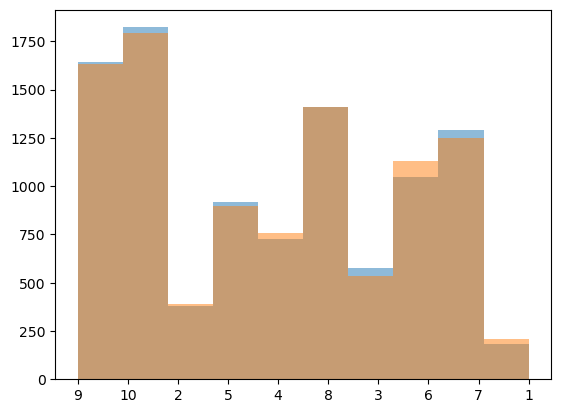

In [ ]:
import matplotlib.pyplot as plt

plt.hist(non_normalized, label="non-normalized", alpha=0.5)
plt.hist(normalized, label="normalized", alpha=0.5)

In [ ]:
from collections import Counter

non = dict(sorted(Counter(non_normalized).items(), key=lambda item: item[1]))
non

{'1': 16,
 '2': 39,
 '4': 58,
 '3': 61,
 '5': 85,
 '6': 96,
 '7': 126,
 '8': 152,
 '10': 177,
 '9': 190}

In [ ]:
norm = dict(Counter(normalized))
norm

{'7': 132,
 '3': 61,
 '4': 93,
 '8': 147,
 '10': 188,
 '6': 93,
 '5': 80,
 '9': 137,
 '1': 23,
 '2': 46}

In [ ]:
x = np.ones((4))
a = np.array([True, False, True, True])
# x[:,1]
x[a]

array([1., 1., 1.])

In [2]:
import numpy as np

In [14]:
a = np.array([1, 2, 3])
b = np.array([1, 5, 0])
# a = np.insert(a, 0, b)
# a

In [15]:
set(a) & set(b)

{1}

In [12]:
np.mean([1, 2])

1.5

In [10]:
sorted_by_age = sorted(zip(a, b), key=lambda x: x[1])
sorted_messages, sorted_shares = [list(i) for i in zip(*sorted_by_age)]

In [11]:
sorted_messages, sorted_shares

([3, 2, 1], [0, 5, 6])

In [4]:
a[1]

5

In [16]:
a += np.ones(len(a), dtype=int)
a

array([2, 3, 4])

In [17]:
a[:2]

array([2, 3])

In [18]:
len(a)

3

In [22]:
isinstance(a, np.ndarray)

True

In [19]:
a.tolist()

[2, 3, 4]

In [23]:
np.mean(np.array([np.nan, 2]))

nan